In [2]:
%matplotlib inline
import pylipid
from pylipid.api import LipidInteraction
import mdtraj as md
print(pylipid.__version__)

Matplotlib is building the font cache; this may take a moment.


1.5.14


In [3]:
trajfile_list = ["XTC/FA_G-prot_1_res_center_fit_last5.xtc"]
topfile_list = ["GRO/FA_G-prot_0_nowat_mda_renumbered2.pdb"]

traj = md.load("XTC/FA_G-prot_1_res_center_fit_last5.xtc", top="GRO/FA_G-prot_0_nowat_mda_renumbered2.pdb", stride=10)

In [21]:
lipid = "PAP6"
cutoffs = [0.475, 0.8] # use of dual-cutoff
nprot = 1  # num. of protein copies in the system. if the simulation system has N copies of receptors,
           # "nprot=N" will report interactions averaged from the N copies, but "nprot=1"
           # will ask pylipid to report interaction data for each copy.
timeunit = 'ns' # Nano-second
save_dir = None  # if None, pylipid data will be saved at current working directory.

# initialize
li = LipidInteraction(trajfile_list, topfile_list=topfile_list, cutoffs=cutoffs, lipid=lipid,
                      nprot=nprot, save_dir=save_dir)

In [22]:
li.collect_residue_contacts()

COLLECT INTERACTIONS FROM TRAJECTORIES: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [21:05<00:00, 1265.93s/it]


In [23]:
durations = li.compute_residue_duration()

CALCULATE DURATION PER RESIDUE: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1014/1014 [02:05<00:00,  8.06it/s]


In [24]:
timeunit = 'us'
koffs, res_times = li.compute_residue_koff(plot_data=True, fig_close=True)
# fig_close=True will close all the figures. As it can generate substantial amount of figures
# (one for each residue), leaving all the figures open can consume considerable amount of memory.

# li.compute_residue_koff(residue_id=[10,15,25,35])
# li.compute_residue_koff(residue_id=10)

Creating new director: /home/au447022/Documents/GCGR_Complex_LB/LIVER/ALL/Interaction_PAP6/Residue_koffs_PAP6


CALCULATE KOFF FOR RESIDUES:   0%|          | 0/1014 [00:00<?, ?it/s]

In [25]:
node_list, modularity = li.compute_binding_nodes(threshold=4, print_data=False)


In [26]:
print(node_list)
print()
print(modularity)

[[0, 1, 2, 3, 4, 5, 175, 176, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 218, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 451, 454], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 179, 180, 181, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424], [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,

In [27]:
durations = li.compute_site_duration()
occupancies = li.compute_site_occupancy()
lipidcounts = li.compute_site_lipidcount()
print(len(node_list), len(li.trajfile_list))
print(len(durations), len(durations[0]))
print(len(occupancies), len(occupancies[0]))
print(len(lipidcounts), len(lipidcounts[0]))

CALCULATE LIPIDCOUNT PER BINDING SITE: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:24<00:00,  2.76s/it]

9 1
9 1
9 1
9 1


In [28]:
koff_BS, res_time_BS = li.compute_site_koff(plot_data=True)

Creating new director: /home/au447022/Documents/GCGR_Complex_LB/LIVER/ALL/Interaction_PAP6/Binding_Sites_koffs_PAP6


CALCULATE KOFF FOR BINDING SITES:   0%|          | 0/9 [00:00<?, ?it/s]

Creating new director: /home/au447022/Documents/GCGR_Complex_LB/LIVER/ALL/Interaction_PAP6/Bound_Poses_PAP6


ANALYZE BOUND POSES:   0%|          | 0/9 [00:00<?, ?it/s]

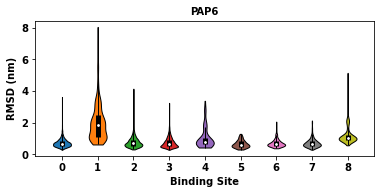

In [29]:
pose_pool, pose_rmsd = li.analyze_bound_poses(binding_site_id=None, pose_format="pdb",
                                             n_top_poses=5, n_clusters='auto') # None means analysis for all residues

CALCULATE BINDING SITE SURFACE AREA:   0%|          | 0/1 [00:00<?, ?it/s]

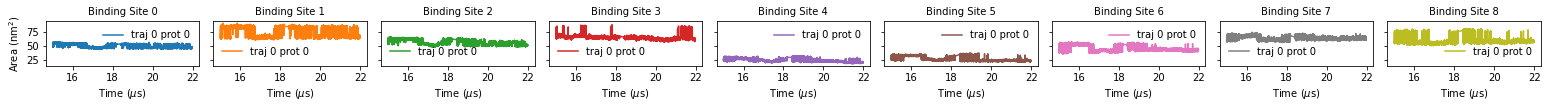

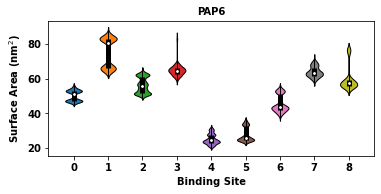

In [30]:
surface_area = li.compute_surface_area(plot_data=True)

Creating new director: /home/au447022/Documents/GCGR_Complex_LB/LIVER/ALL/Interaction_PAP6/Figure_PAP6


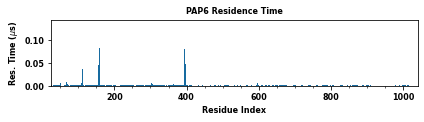

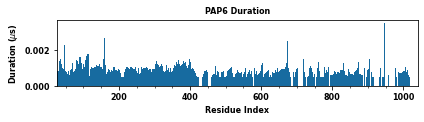

In [31]:
for item in ["Residence Time", "Duration", "occupancy", "lipid Count"]:
    li.plot(item=item) # plot values as a function of time


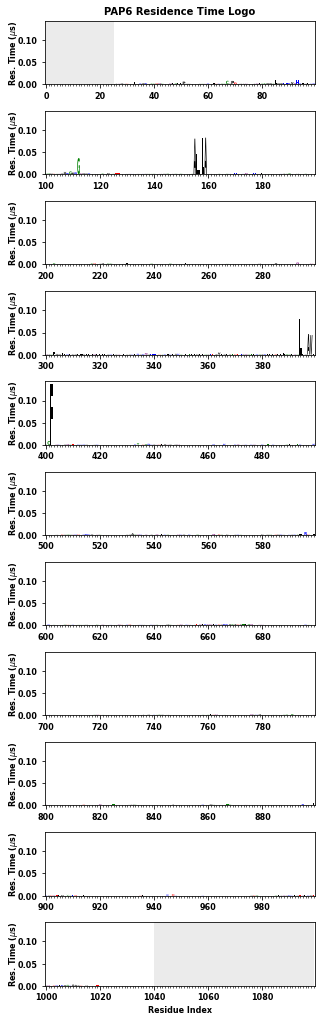

In [32]:
li.plot_logo(item="Residence Time")

In [33]:
li.save_coordinate(item="Residence Time") # write protein coordinate in pdb format with the b factor column
                                          # showing 'Residence Time' values

Creating new director: /home/au447022/Documents/GCGR_Complex_LB/LIVER/ALL/Interaction_PAP6/Coordinate_PAP6


## Determning cutoffs for the different lipid types

In [4]:
from itertools import product
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from pylipid.util import get_traj_info, check_dir
import matplotlib.ticker as ticker

def plot_minimum_distances(distances, times, title, fn):
    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
    ax.plot(times, distances)
    ax.set_xlabel(r"Time ($\mu$s)")
    ax.set_ylabel("Minimum distances (nm)")
    ax.set_title(title)
    ax.set_ylim(0, 1.0)
    plt.tight_layout()
    plt.savefig(fn, dpi=200)
    plt.close()
    return


def compute_minimum_distance(traj, lipid, fig_dir, lipid_atoms=None,
                            contact_frames=10, distance_threshold=0.65):
    DIST_CONTACT_ALL = []
    traj_info, _, _ = get_traj_info(traj, lipid, lipid_atoms=lipid_atoms)
    for protein_idx in np.arange(nprot, dtype=int):
        for residue_idx, residue_atom_indices in enumerate(
            traj_info["protein_residue_atomid_list"][protein_idx]):
            dist_matrix = np.array([np.min(
                            md.compute_distances(traj, np.array(list(product(residue_atom_indices, lipid_atom_indices)))),
                            axis=1) for lipid_atom_indices in traj_info["lipid_residue_atomid_list"]])
            # plot distances
            for lipid_idx in np.arange(len(dist_matrix)):
                if sum(dist_matrix[lipid_idx] < distance_threshold) >= contact_frames:
                    DIST_CONTACT_ALL.append(dist_matrix[lipid_idx])
                    plot_minimum_distances(dist_matrix[lipid_idx], traj.time/1000000.0,
                                           "{}-{}{}".format(traj_info["residue_list"][residue_idx], lipid, lipid_idx),
                                           "{}/dist_{}_{}{}.png".format(fig_dir, traj_info["residue_list"][residue_idx],
                                                                        lipid, lipid_idx))

    return DIST_CONTACT_ALL

def plot_PDF(distance_set, num_of_bins, fn):
    fig, ax = plt.subplots(1,1)
    ax.hist(distance_set, bins=num_of_bins, density=True)
    ax.set_xlim(0, 1.0)
    ax.set_xlabel("Minimum distance (nm)")
    ax.set_ylabel("Probablity Density")
    ax.set_title(lipid)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    plt.tight_layout()
    plt.savefig(fn, dpi=200)
    return

In [5]:
#Identifying cutoffs

trajfile = "XTC/FA_G-prot_1_res_center_fit_last5.xtc"
topfile = "GRO/FA_G-prot_0_nowat_mda_renumbered2.pdb"

traj = md.load(trajfile, top=topfile)

for lipid in ['PAP6', 'POPS', 'POPG' ,'POPS', 'CHOL']:

    lipid_atoms = None # all lipid atom/bead will be considered
    nprot = 1
    save_dir = "Pylipid_analysis/test_minimum_dist_{}".format(lipid)
    fig_dir = check_dir(save_dir, "Figures", print_info=False)
    contact_frames = 30  # will only plot data if the contact was formed over ${contact_frames} frames.

    minimum_distance_set = compute_minimum_distance(traj, lipid, fig_dir, lipid_atoms=lipid_atoms,
                                                   contact_frames=2, distance_threshold=0.3)

    distance_set = np.concatenate(minimum_distance_set)
    num_of_bins = 1000
    fig_fn = "{}/dist_distribut_{}.png".format(save_dir, lipid)
    #plot_PDF(distance_set, num_of_bins, fig_fn)

MemoryError: Unable to allocate 366. MiB for an array with shape (95964120,) and data type float32